In [25]:
%matplotlib inline
%qtconsole

import os
import cPickle
import numpy as np
import pandas
from scipy import linalg

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.figure import Figure
from matplotlib.colors import from_levels_and_colors
from mpl_toolkits.basemap import Basemap
from getSkill import getSkill
from t_subsample import t_subsample

figdir = 'Figs/'

proxy_pandas_metafile = 'NCDC_v0.1.0all_Metadata.df.pckl'
proxy_pandas_datafile = 'NCDC_v0.1.0all_Proxies.df.pckl'

proxy_meta = pandas.read_pickle(proxy_pandas_metafile)
proxy_data = pandas.read_pickle(proxy_pandas_datafile)

proxy_data = proxy_data[0:2013]

# Reformat the proxy_meta to get rid of special characters
proxy_meta.columns = [x.strip().replace(' ','_') for x in proxy_meta.columns]
proxy_meta.columns = [x.strip().replace('(','') for x in proxy_meta.columns]
proxy_meta.columns = [x.strip().replace(')','') for x in proxy_meta.columns]
proxy_meta.columns = [x.strip().replace('.','') for x in proxy_meta.columns]

# Change the metadata file so that indices are NCDC IDs (better matchup with data file)
proxy_meta.index = proxy_meta['NCDC_ID']

proxy_meta['Archive_type'] = proxy_meta['Archive_type'].str.replace(' ','_')

# sort the metadata to have the same order as the data file
proxy_meta = proxy_meta.loc[proxy_data.columns]


Notes

 Groups are coded as follows:
 - 'c': 'Corals_and_Sclerosponges'
 - 'i': 'Ice_Cores'
 - 'l': 'Lake_Cores'
 - 'm': 'Marine_Cores'
 - 's': 'Speleothems'
 - 't': 'Tree_Rings'

tau is the predictive time scale. It is also the size of the bin width used to average records in time.

**Some observations**
- Just looking at different lag covariances is interesting
- If I don't condition the pseudoinverse, G gets very small




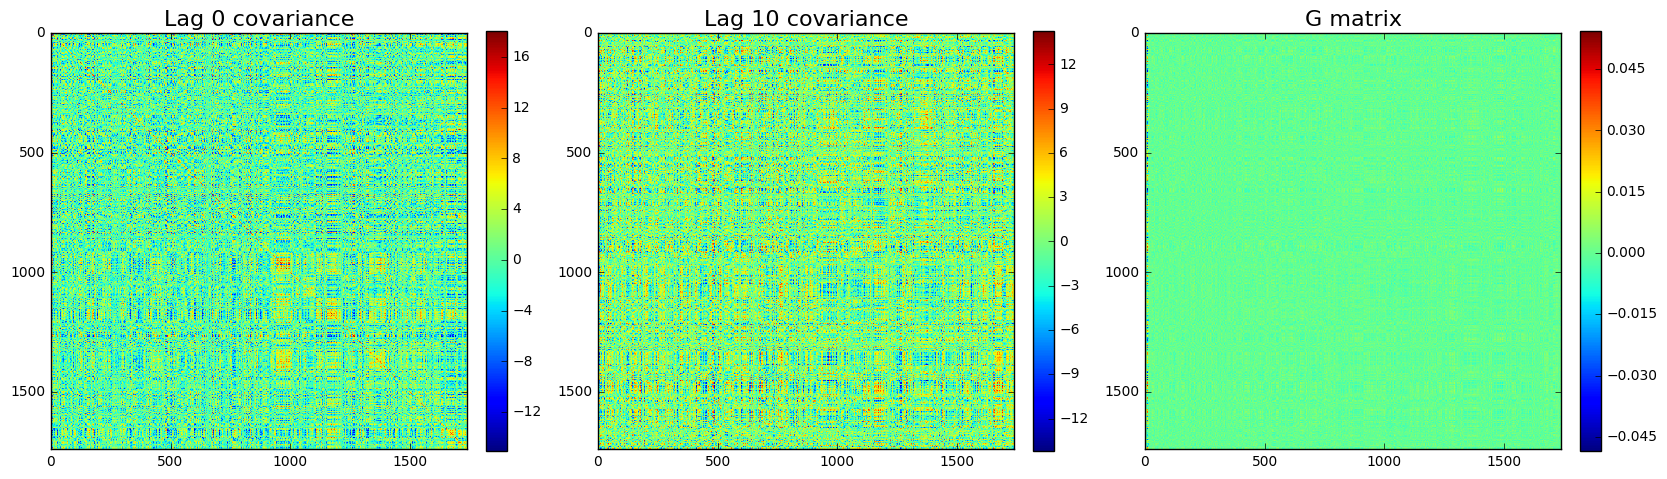

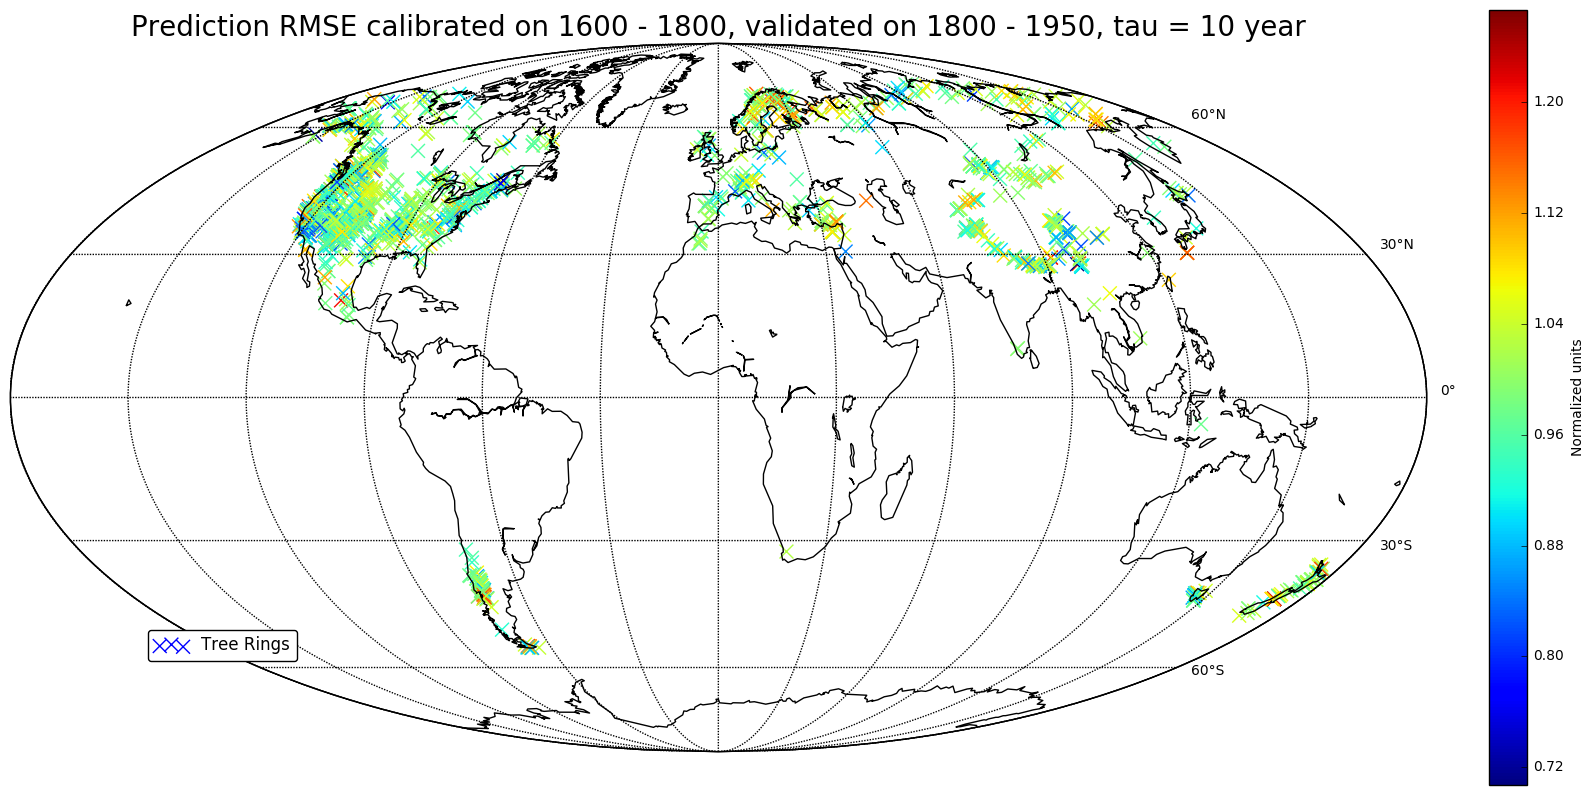

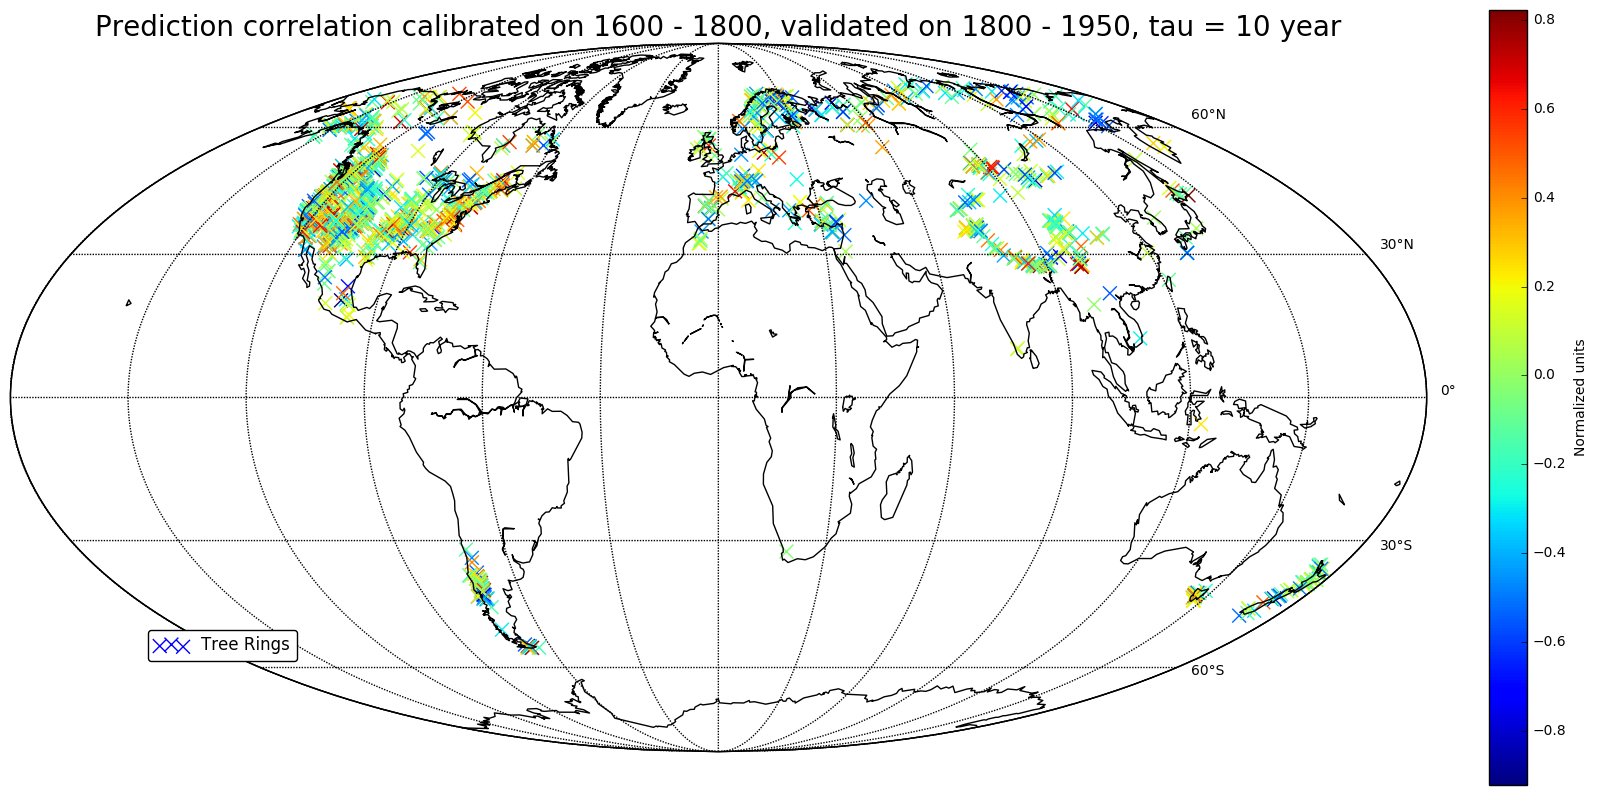

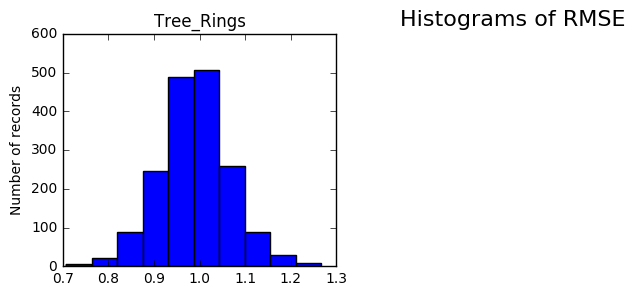

In [4]:
# Experiment 1
# 

tau = 10
calInt = [1600,1800]
valInt = [1800,1950]
#valInt = calInt

#data_types = {'c', 'i','l','m','s','t'}
data_types = {'t'}
doEOF = False
doDetrend=True

corrdf,rmsedf,G,c0,ct,pmSkill = getSkill(data_types,proxy_data,proxy_meta,tau,calInt,valInt,doEOF,10,doDetrend)



In [ ]:
# Experiment 1.1
# EOF vs proxy basis appears to make little/no difference in the reconstruction when there is not much EOF truncation (tol = 0.1*max(lambda))

tau = 1
calInt = [1700,1800]
valInt = [1800,1900]
#valInt = calInt

data_types = {'c', 'i','l','m','s','t'}
doEOF = False

rdf,G,c0,ct,pmSkill = getSkill(data_types,proxy_data,proxy_meta,tau,calInt,valInt,doEOF)



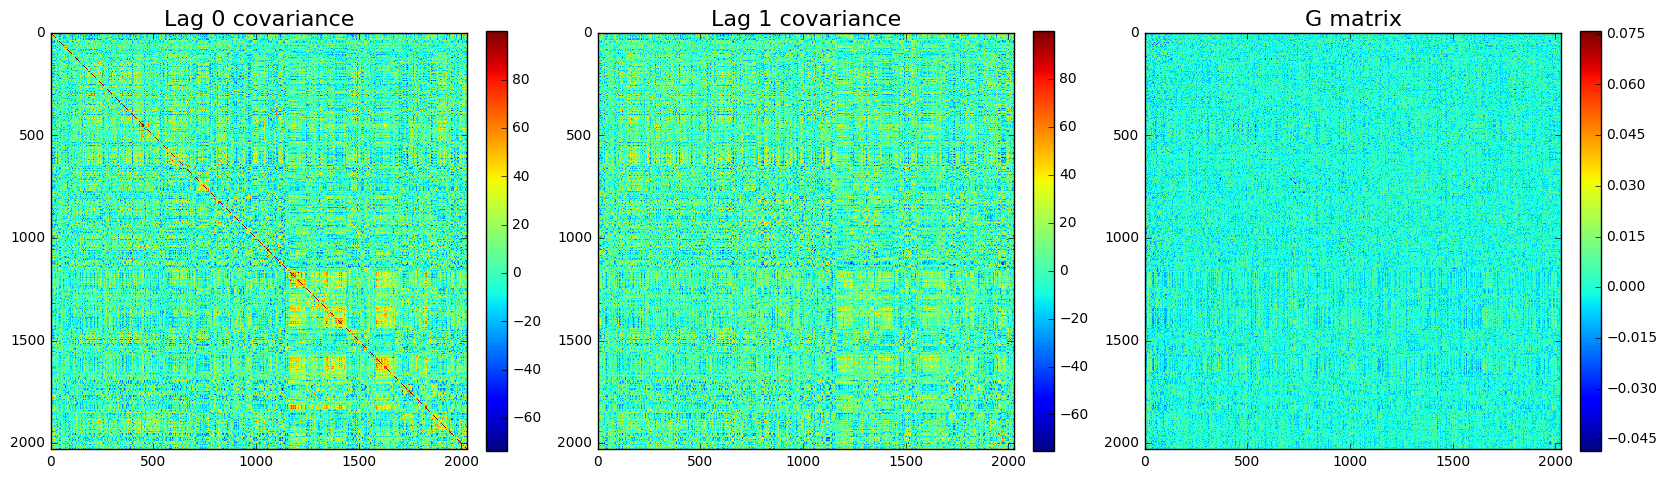

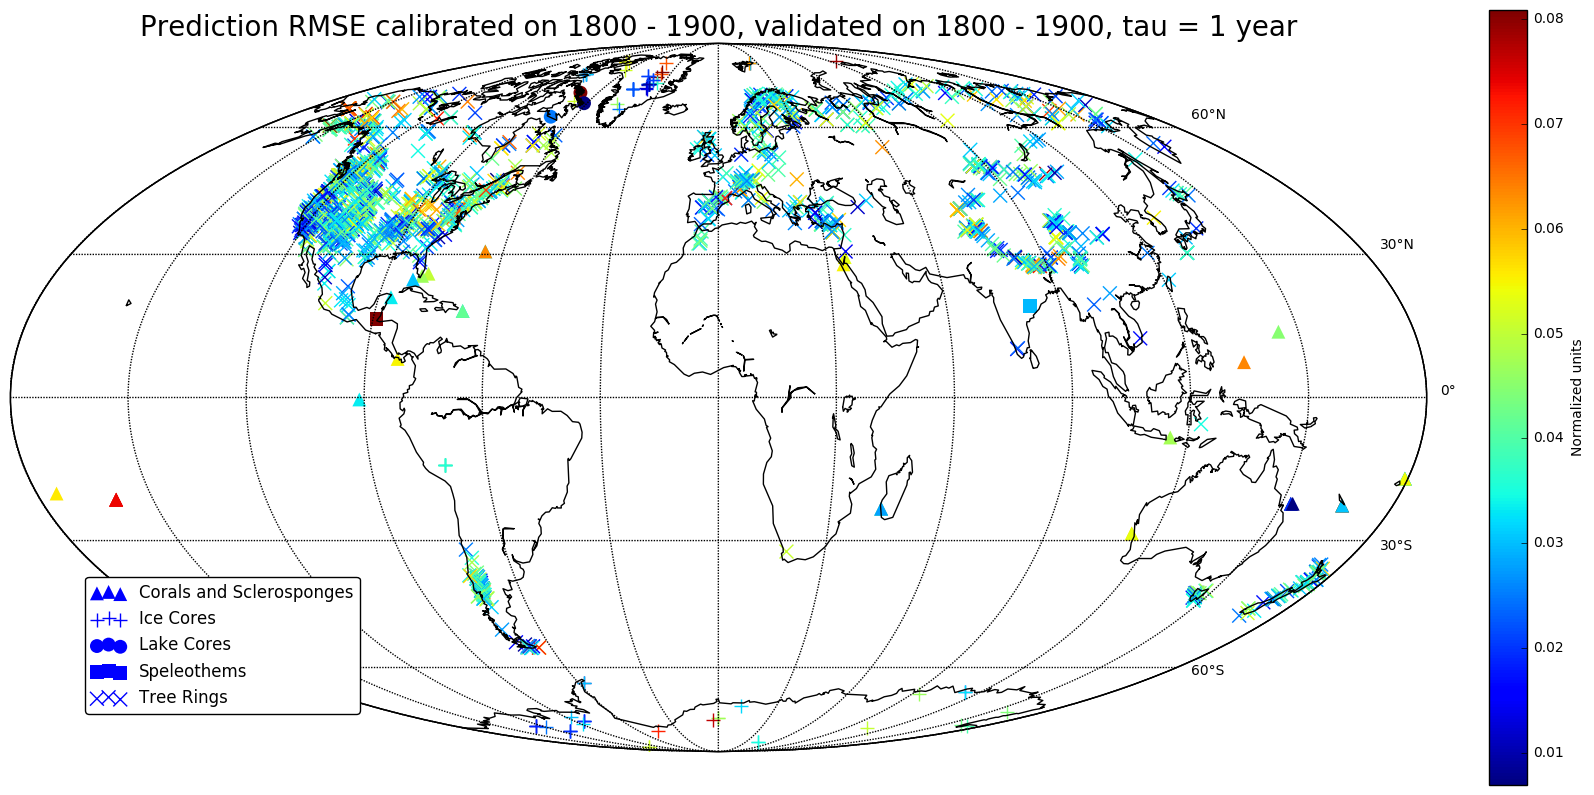

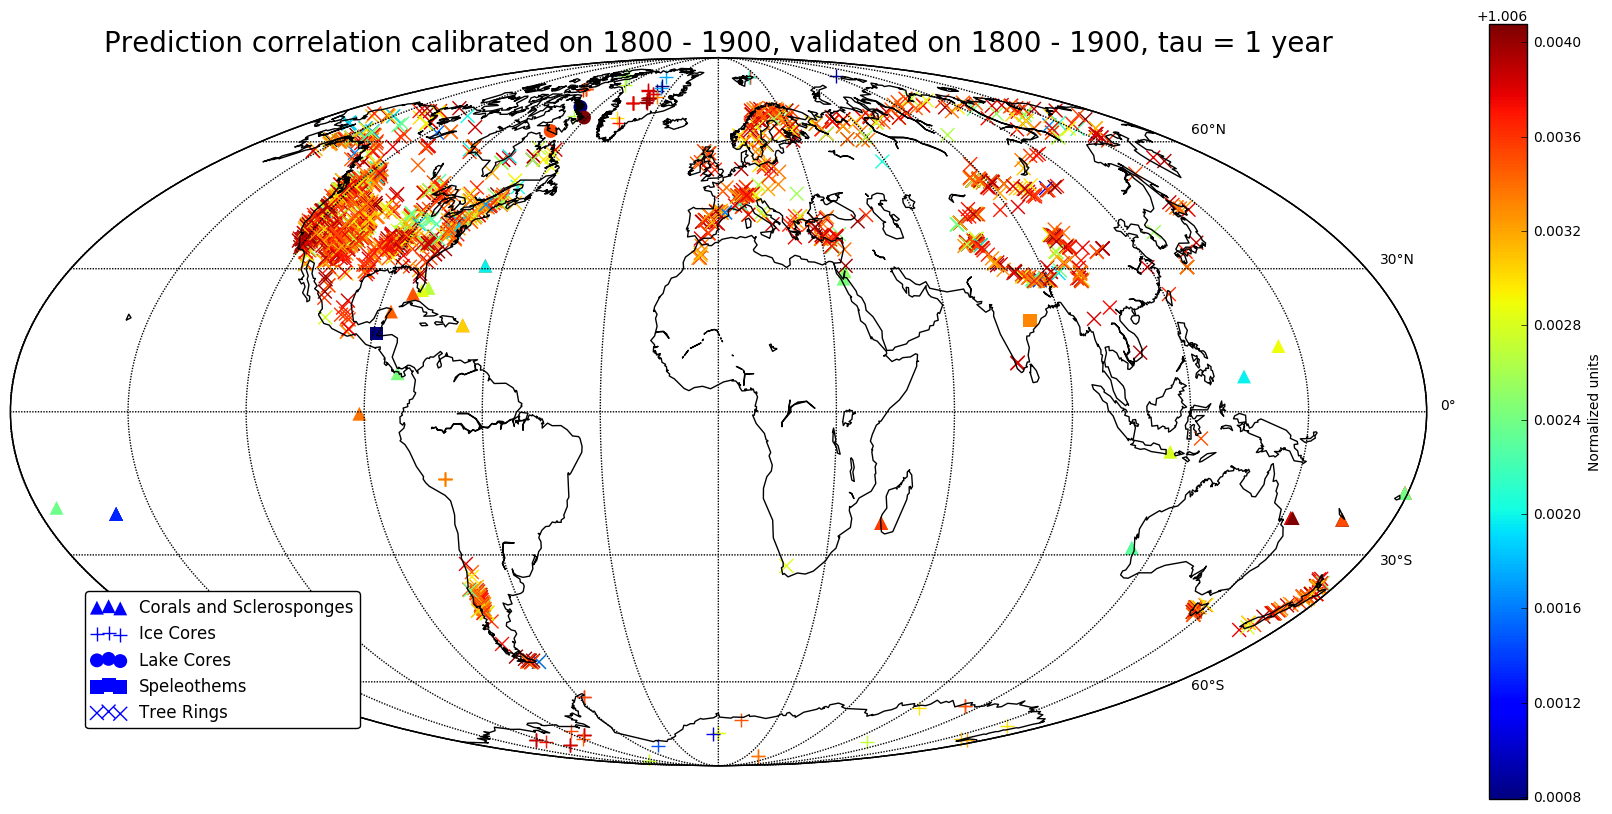

ValueError: too many values to unpack

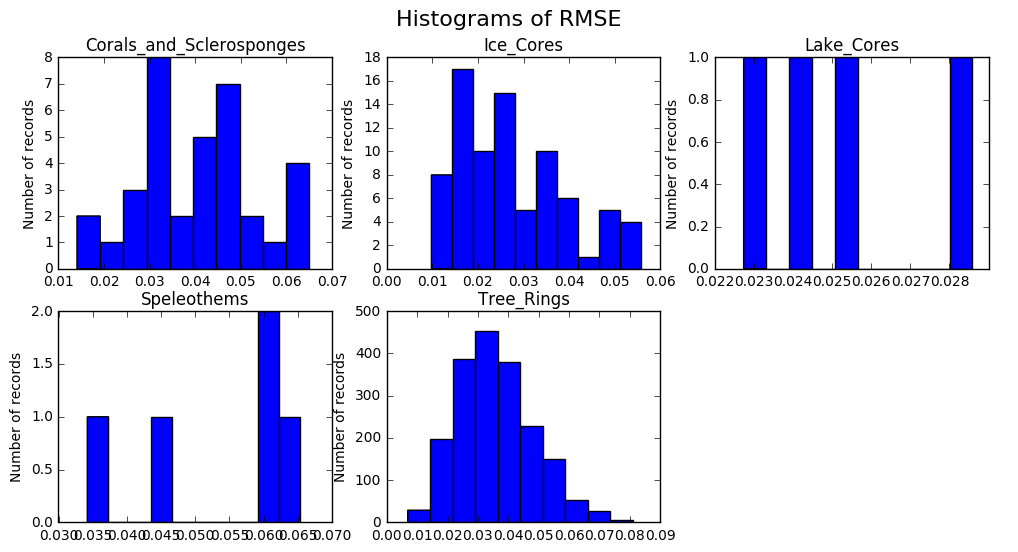

In [5]:
# Experiment 1.2
# Same cal and val. Little discernible improvement

tau = 1
calInt = [1800,1900]
valInt = [1800,1900]
#valInt = calInt

data_types = {'c', 'i','l','m','s','t'}
doEOF = False

rdf,G,c0,ct,pmSkill = getSkill(data_types,proxy_data,proxy_meta,tau,calInt,valInt,doEOF)




In [ ]:
# Experiment 2
# Longer calibration interval, just trees

tau = 10
calInt = [1500,1800]
valInt = [1800,1900]
#valInt = calInt

data_types = {'t'}
doEOF = True

rdf,G,c0,ct,pmSkill = getSkill(data_types,proxy_data,proxy_meta,tau,calInt,valInt,doEOF)



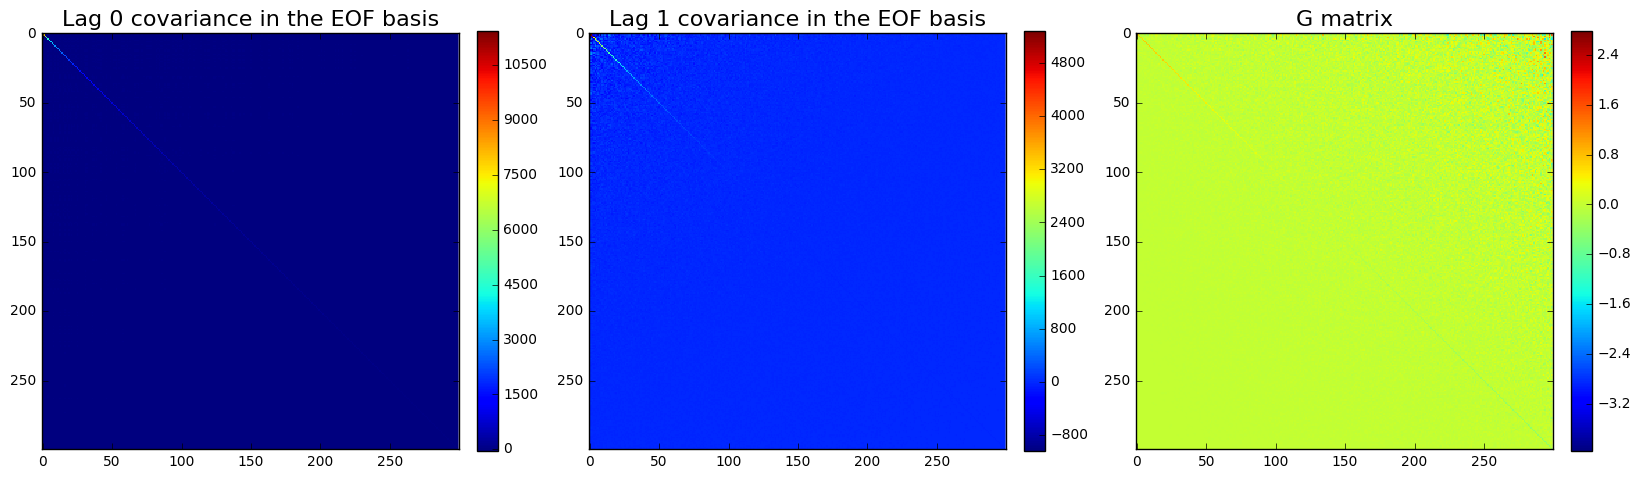

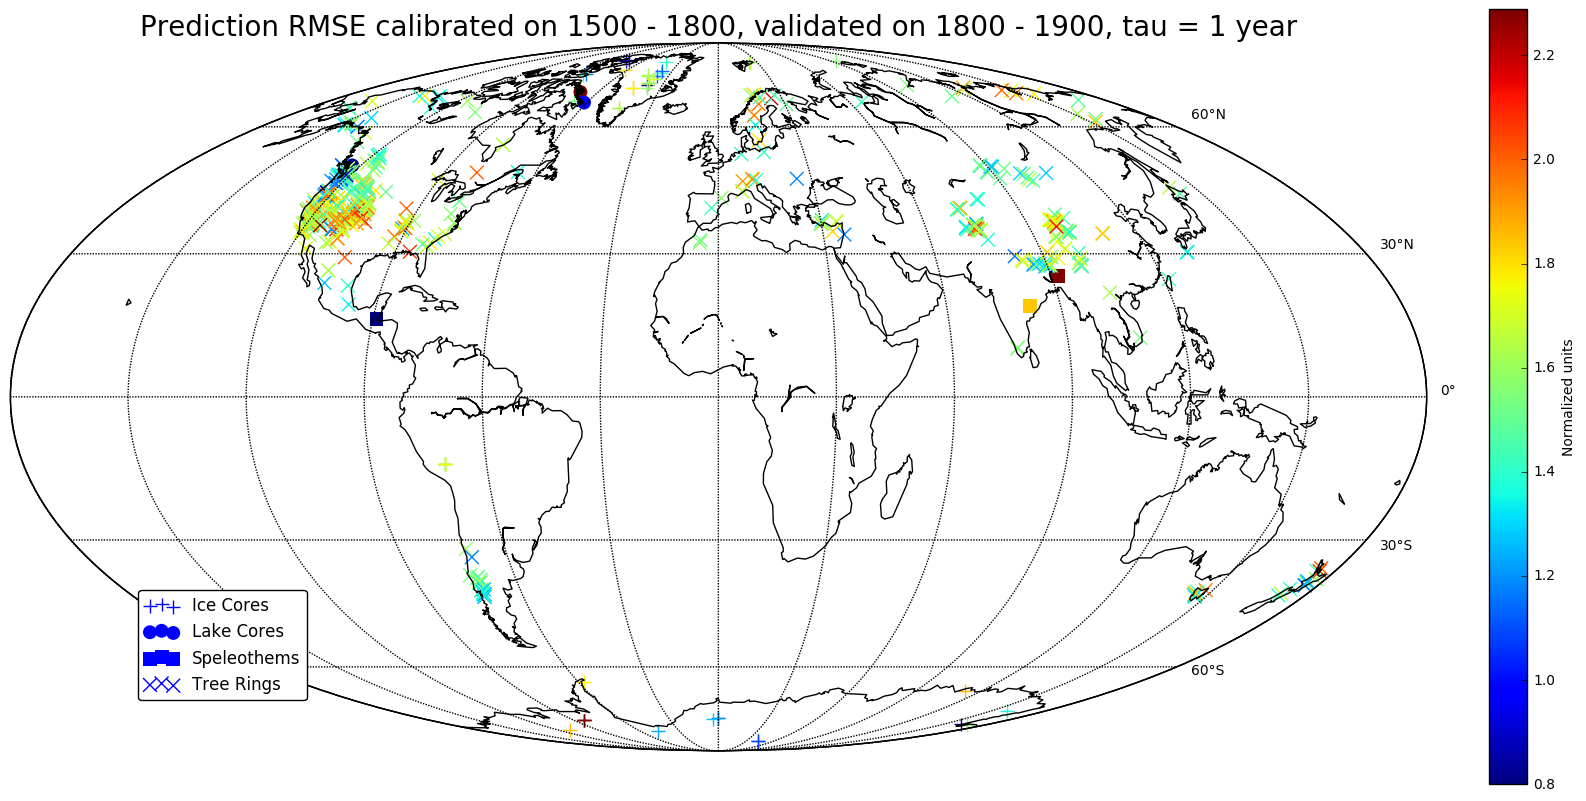

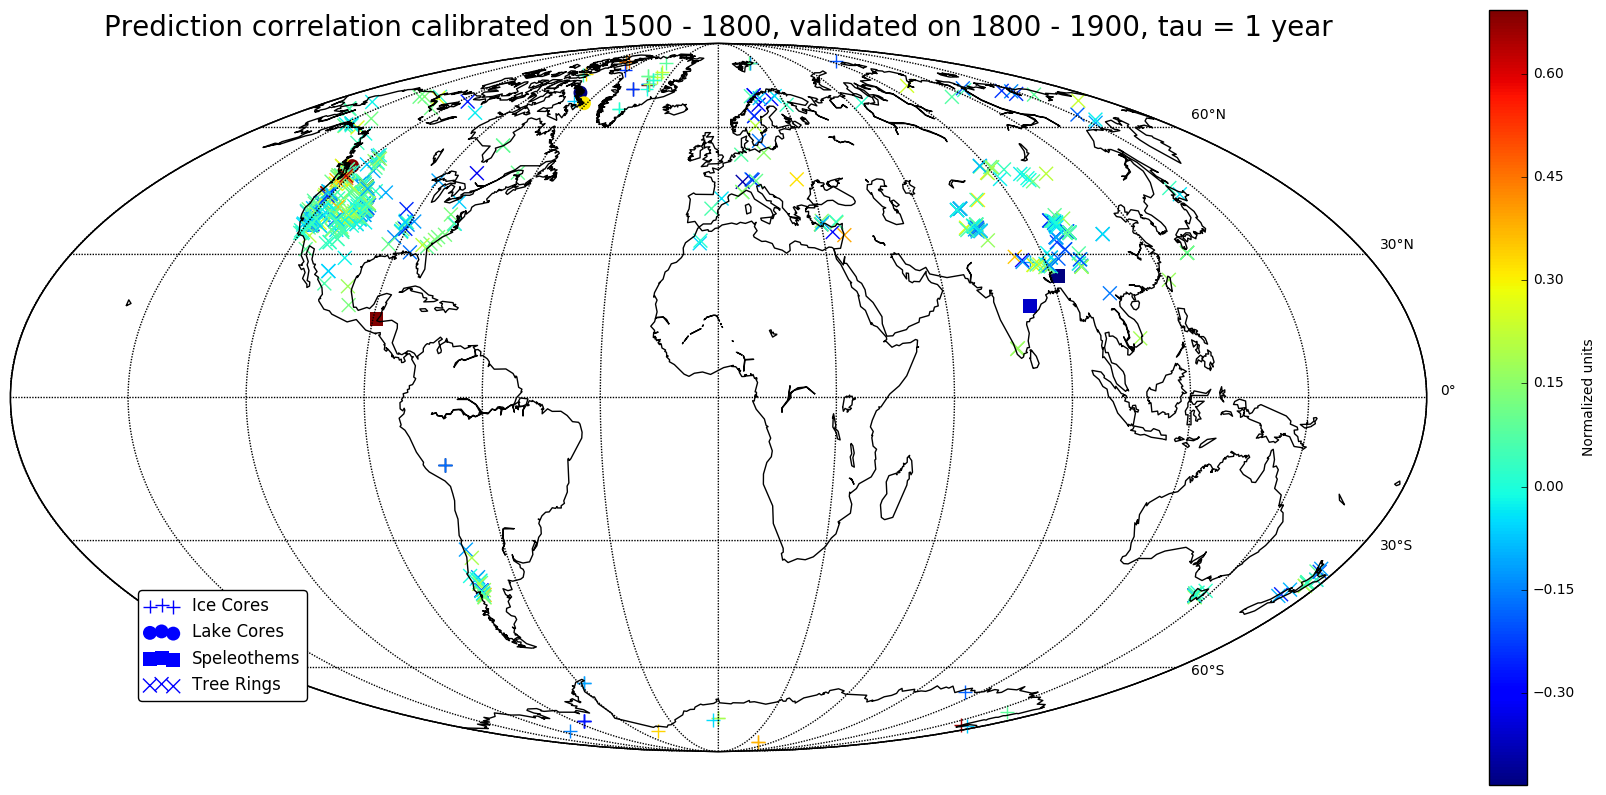

ValueError: too many values to unpack

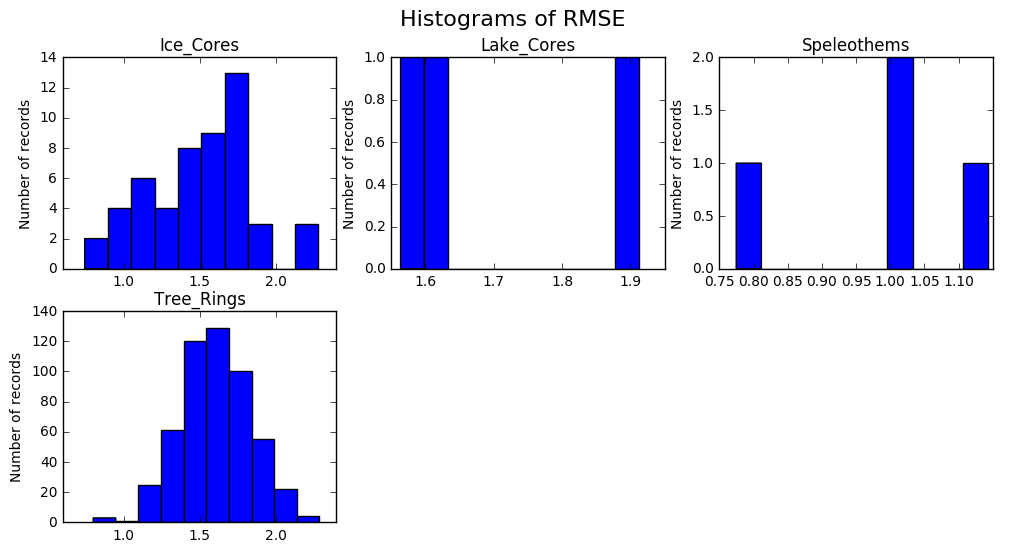

In [6]:
# Experiment 2
# Longer calibration interval, just trees

tau = 1
calInt = [1500,1800]
valInt = [1800,1900]
#valInt = calInt

data_types = {'c', 'i','l','m','s','t'}
doEOF = True

rdf,G,c0,ct,pmSkill = getSkill(data_types,proxy_data,proxy_meta,tau,calInt,valInt,doEOF)





In [26]:
### Compute a spatially averaged field
from gridAvg import gridAvg
from getSkillGridded import getSkillGridded
RES = 4;
Gn, pmg, lat_g,lon_g = gridAvg(proxy_meta,proxy_data,RES,RES)
# Define a grid. RES is resolution in degrees.
# Mask and plot with basemap

corrdf,rmsedf,G,c0,ct = getSkillGridded(Gn,1,[1100,1450],[1100,1450],True,50);



AttributeError: 'numpy.ndarray' object has no attribute 'loc'